# NumPy und Matplotlib

In [1]:
import numpy as np

## Universal functions (ufunc)

Die universellen Funktionen aus NumPy (sin, cos, tan, arcsin, arccos, sinh, cosh, arcsinh, ... exp, log, log2, log10, sqrt, ...) wirken elementweise, wenn sie auf NumPy Arrays angewandt werden. https://numpy.org/doc/stable/reference/ufuncs.html

In [2]:
x = np.linspace(0, 5*np.pi, 10) # 10 äquidistante Zahlen zwischen 0 und 5 pi
x, np.sin(x)

(array([ 0.        ,  1.74532925,  3.4906585 ,  5.23598776,  6.98131701,
         8.72664626, 10.47197551, 12.21730476, 13.96263402, 15.70796327]),
 array([ 0.00000000e+00,  9.84807753e-01, -3.42020143e-01, -8.66025404e-01,
         6.42787610e-01,  6.42787610e-01, -8.66025404e-01, -3.42020143e-01,
         9.84807753e-01,  6.12323400e-16]))

In [5]:
np.info(np.arctan)

arctan(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric inverse tangent, element-wise.

The inverse of tan, so that if ``y = tan(x)`` then ``x = arctan(y)``.

Parameters
----------
x : array_like
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``, locations within it where the condition is False will
    rem

In [4]:
%%timeit
y = np.sin(x)

576 ns ± 26.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit
l = []
for xx in x:
    l.append(np.sin(xx))
y = np.array(l)

8.61 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Pyplot

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

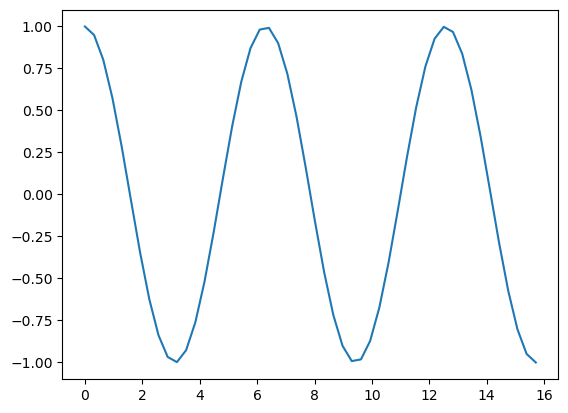

In [8]:
x = np.linspace(0, 5*np.pi)
y = np.cos(x)
plt.plot(x, y); # Polygozug zu den Punkten (x[i], y[i]) i = 0 ...

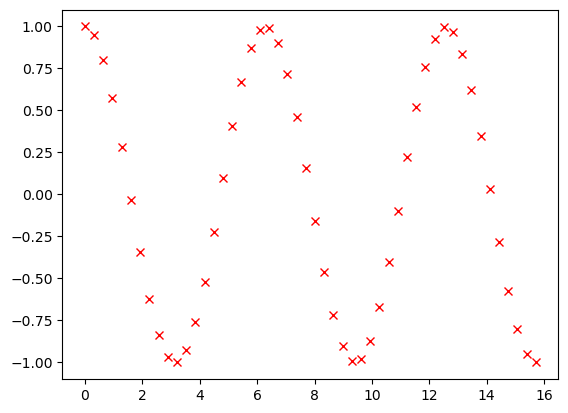

In [9]:
plt.plot(x, y, 'rx'); 

Farben als Kürzel

|b   |g    |r  |c   |m      |y     |k    |w    |
|----|-----|---|----|-------|------|-----|-----|
|blue|green|red|cyan|magenta|yellow|black|white|

In [10]:
linestyles = ['-', '--', '-.', ':']

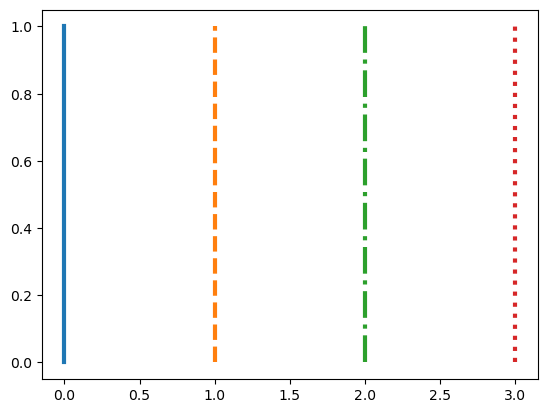

In [11]:
for count, ls in enumerate(linestyles):
    plt.plot([count, count], [0, 1], ls, linewidth=3)

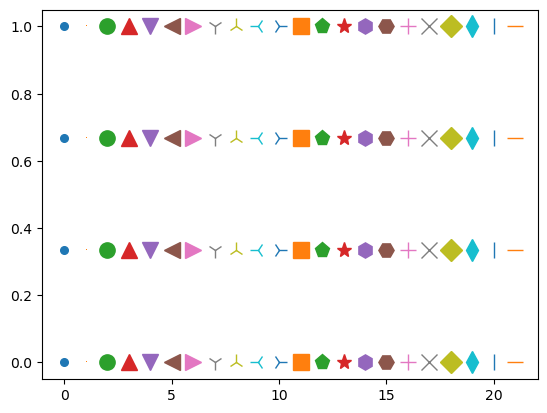

In [12]:
markers = ['.', ',', 'o', '^', 'v', '<', '>', '1', '2', '3', '4', 's', 'p',]
markers += ['*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
y = np.linspace(0, 1, 4)
x = np.zeros_like(y)
for i, m in enumerate(markers):
    plt.plot(x+i, y, m, markersize=11)


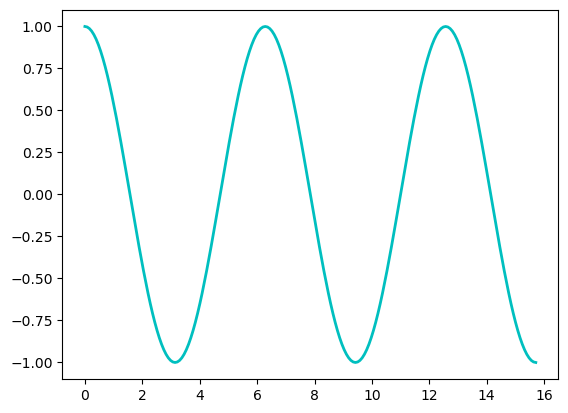

In [13]:
x = np.linspace(0, 5*np.pi, 201)
y = np.cos(x)
plt.plot(x, y, 'c', linewidth=2); # das ; unterdrückt die Ausgabe

Mehrere Graphen in einem Bild

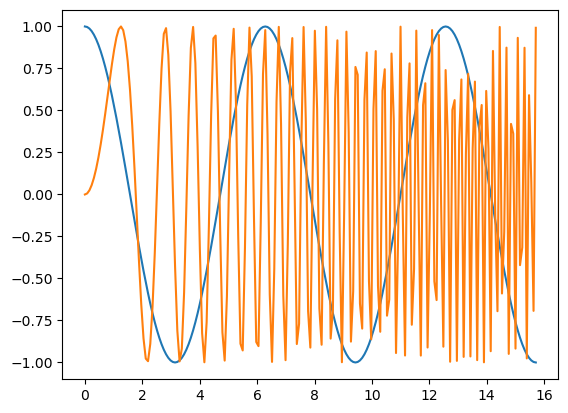

In [14]:
z = np.sin(x**2)
plt.plot(x, y)
plt.plot(x, z); 

Hier gibt es immer noch nicht genug Punkte

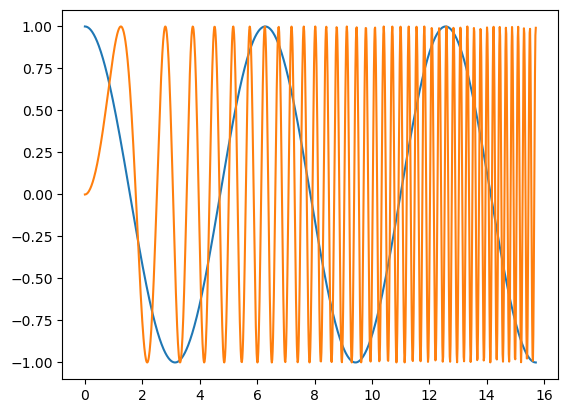

In [15]:
x = np.linspace(0, 5*np.pi, 1101)
y = np.cos(x)
z = np.sin(x**2)
plt.plot(x, y)
plt.plot(x, z);

### Abschnittsweise definierte Funktionen / Slicing

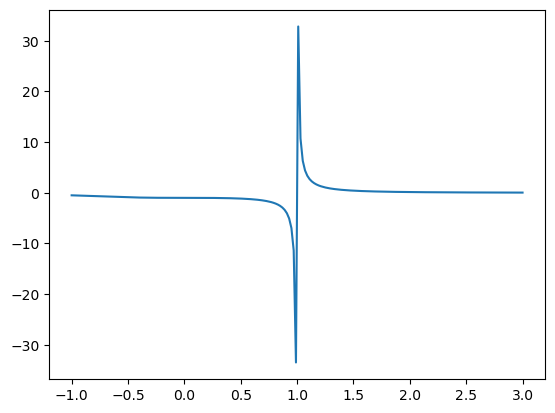

In [16]:
x = np.linspace(-1, 3, 200)
y = 1/(x**3-1)
plt.plot(x, y);

Der Sprung von $-\infty$ nach $\infty$ muss weg:

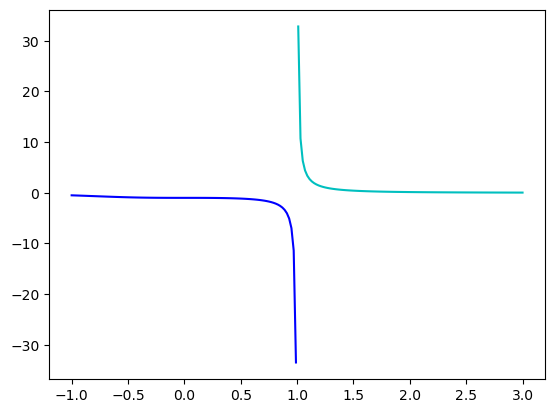

In [17]:
b = y>0
c = y<0
plt.plot(x[b], y[b], 'c')
plt.plot(x[c], y[c], 'b');

Ausschnitt festelgegen

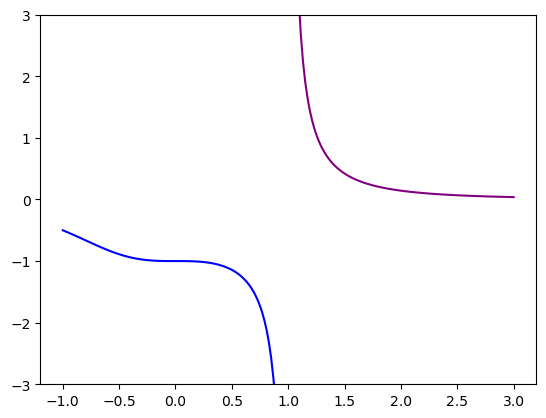

In [18]:
b = y>0
c = y<0
plt.plot(x[b], y[b], color='purple')
plt.plot(x[c], y[c], 'b')
plt.axis(ymin=-3, ymax=3);

(-3.0, 3.0)

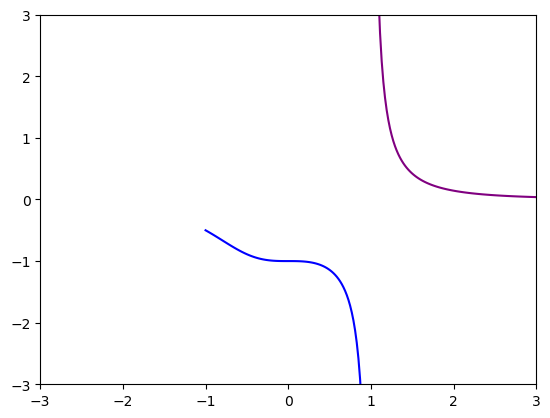

In [19]:
b = y>0
c = y<0
plt.plot(x[b], y[b], color='purple')
plt.plot(x[c], y[c], 'b')
plt.ylim([-3,3])
plt.xlim([-3,3])

https://matplotlib.org/stable/gallery/color/named_colors.html

Format ändern, Titel und Legende

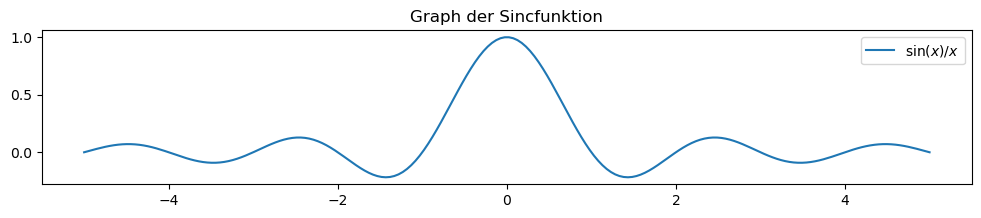

In [20]:
x = np.linspace(-5, 5, 200)
plt.figure(None, (12, 2))
plt.plot(x, np.sinc(x), label='$\sin(x)/x$')
plt.title("Graph der Sincfunktion")
plt.legend(loc="upper right");

Dasselbe objektorientiert

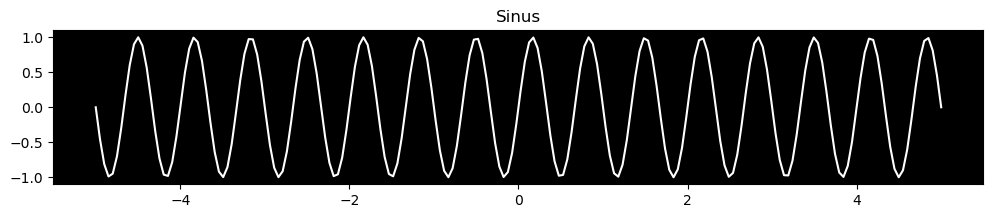

In [21]:
fig = plt.figure(None, (12, 2)) # figure Objekt
ax = fig.gca()   # "get current axes" Koordinatensystem 
ax.plot(x, np.sin(3*np.pi*x), 'w')
ax.set_title("Sinus")
ax.set_facecolor('k')

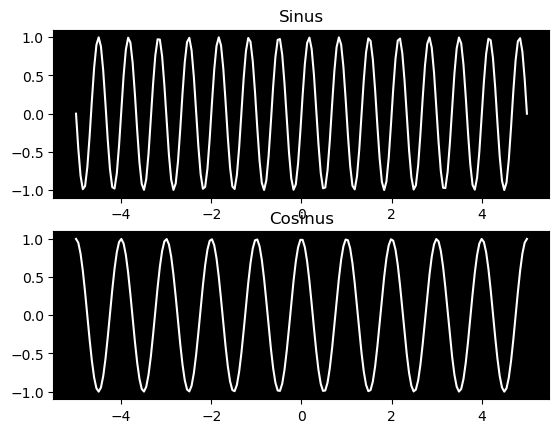

In [22]:
fig, axs = plt.subplots(2,1)   # 2 x 1 Koordinatensysteme 
axs[0].plot(x, np.sin(3*np.pi*x), 'w')
axs[1].plot(x, np.cos(2*np.pi*x), 'w')
axs[0].set_title('Sinus')
axs[1].set_title('Cosinus')
for ax in axs:
    ax.set_facecolor('k')

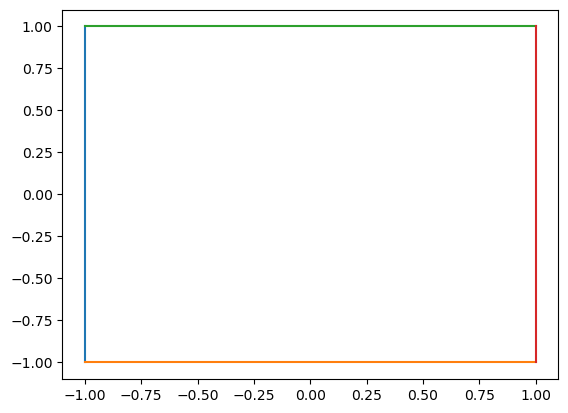

In [26]:
from itertools import product, combinations
for p1, p2 in combinations(np.array(list(product([-1, 1], repeat=2))), 2):  
    if np.sum((p1-p2)**2) == 4: # Diagonale(n) entfernen
        plt.plot(*zip(p1,p2))


In [27]:
list(product([-1, 1], repeat=2)) # (karthesiches Produkt [-1,1] x [-1,1])

[(-1, -1), (-1, 1), (1, -1), (1, 1)]

In [28]:
def n_eck(n):
    ''' Eckpunkte eines n-Ecks'''
    x = [np.sin(2*np.pi*j/n) for j in range(n+1)]
    y = [np.cos(2*np.pi*j/n) for j in range(n+1)]
    return x, y

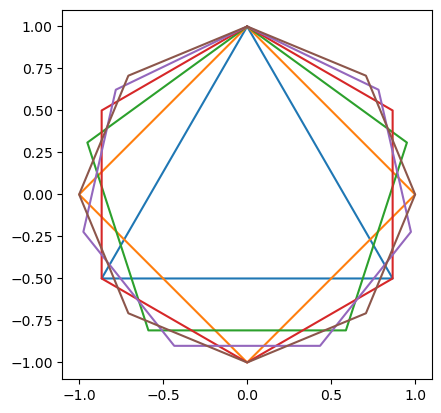

In [29]:
for n in range(3, 9):
    plt.plot(*n_eck(n))  # <- Auspacken
plt.axis('image');